In [1]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Using TensorFlow backend.


Loading data...
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [ ]:
input_train.head(5)

In [11]:
len(input_train)

25000

In [12]:
print(max_features)

10000


In [14]:
len (y_train)

25000

In [6]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense



model = Sequential() 
model.add(Embedding(max_features, 32)) 
model.add(SimpleRNN(32)) 
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc']) 
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.6669 - acc: 0.5860 - val_loss: 0.5466 - val_acc: 0.7406
Epoch 2/10
20000/20000 [==============================] - 48s 2ms/step - loss: 0.4335 - acc: 0.8086 - val_loss: 0.3760 - val_acc: 0.8430
Epoch 3/10
20000/20000 [==============================] - 47s 2ms/step - loss: 0.3031 - acc: 0.8754 - val_loss: 0.3648 - val_acc: 0.8394
Epoch 4/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.2305 - acc: 0.9090 - val_loss: 0.3974 - val_acc: 0.8336
Epoch 5/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.1512 - acc: 0.9459 - val_loss: 0.4196 - val_acc: 0.8344
Epoch 6/10
20000/20000 [==============================] - 46s 2ms/step - loss: 0.0947 - acc: 0.9677 - val_loss: 0.4907 - val_acc: 0.8176
Epoch 7/10
20000/20000 [==============================] - 45s 2ms/step - loss: 0.0603 - acc: 0.9814 - val_loss: 0.4763 - val_acc:

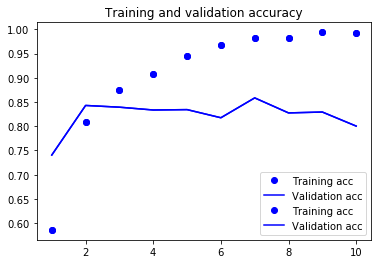

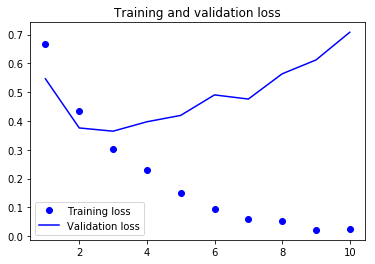

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()